https://blog.gopenai.com/unleashing-the-power-of-linear-regression-in-python-an-in-depth-guide-with-practical-coding-ac012326086f

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Boston housing dataset
boston = datasets.load_boston()
# Define predictors and response
X = boston.data[:, 5:6] # average number of rooms
y = boston.target # house prices
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
# Fit the linear regression model
model = LinearRegression().fit(X_train, y_train)
# Print the coefficient and intercept
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [9.34830141]
Intercept: -36.24631889813795


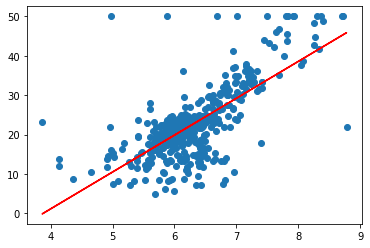

In [17]:
import matplotlib.pyplot as plt

# Plot the data and the model prediction
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.show()

In [18]:
# Define predictors and response
X = boston.data[:, [5, 12]] # RM and LSTAT
y = boston.target # house prices

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)
# Fit the multiple linear regression model
model = LinearRegression().fit(X_train, y_train)
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 5.46509877 -0.63249856]
Intercept: -3.841177079004865


# Question Review

1. Define simple linear regression and its key elements. How is it different from multiple linear regression?

We normally learn about linear regression with the following expression, where a is the intercept and b is the slope.

$$
y =a +b \cdot x
$$

Multiple regression can be described with the following expression.

$$
y =a +b_1 \cdot x_1 +b_2 \cdot x_2 + \ldots + b_n \cdot x_n
$$


8. Demonstrate how to conduct residual analysis and validate the assumptions of linear regression using Python.

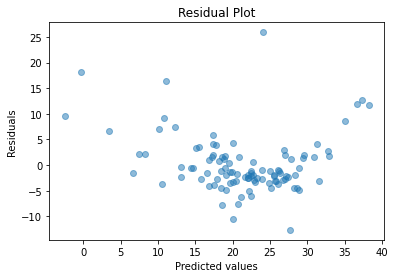

In [41]:
# Alternative library with good residual support: https://www.statology.org/residual-plot-python/
# Checkout CCPR plot
# Predicting values using approach from 
# https://lifewithdata.com/2023/06/05/how-to-create-a-residual-plot-in-python/
y_pred = model.predict(X_test)

# Calculating residuals
residuals = y_test - y_pred

import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_pred, residuals, alpha=0.5)

# Title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

11. Discuss how to measure the goodness-of-fit of a linear regression model in Python.

R2 or the coefficient of determination is the most commonly used goodness-of-fit parameter. You cannot use R2 to determine if the coefficients and predictions are biased, so you need to examine the residual plot to ensure that the assumptions are met. A biased model consistently over- or under-predictes the data. Patterns in the residuals indicates bias.

Let's compute the R2 for the model in this sheet.

In [34]:
from sklearn.metrics import r2_score
# r2_score(y_true, y_pred)
# Here is the calculation on the training set
print(f'R\N{SUPERSCRIPT TWO} on the training set is {r2_score(y_train,model.predict(X_train))}')
# The calculation on the test set is probably more interesting because it was not used to create the model.
print(f'R\N{SUPERSCRIPT TWO} on the test set is {r2_score(y_test,model.predict(X_test))}')

R² on the training set is 0.6501592679428922
R² on the test set is 0.5739577415025859
